In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd
import missingno as msno
%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submit = pd.read_csv('gender_submission.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# 認為將小孩及兄弟姊妹的因素一起考慮，能降低誤差，因此合併為同一項

In [6]:
train['Family_size'] = train['Parch'] + train['SibSp']
test['Family_size'] = test['Parch'] + test['SibSp']

In [7]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_size
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,10.000000


In [8]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Family_size
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.839713
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,1.519072
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,10.000000


In [9]:
selected_features = ['Pclass', 'Age', 'Family_size', 'Fare', 'Sex', 'Embarked']

In [10]:
X_train = train[selected_features]

In [11]:
y_train = train['Survived']

In [12]:
X_test = test[selected_features]

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass         891 non-null int64
Age            714 non-null float64
Family_size    891 non-null int64
Fare           891 non-null float64
Sex            891 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 41.8+ KB


In [14]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass         418 non-null int64
Age            332 non-null float64
Family_size    418 non-null int64
Fare           417 non-null float64
Sex            418 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 19.7+ KB


# 視覺化缺失值

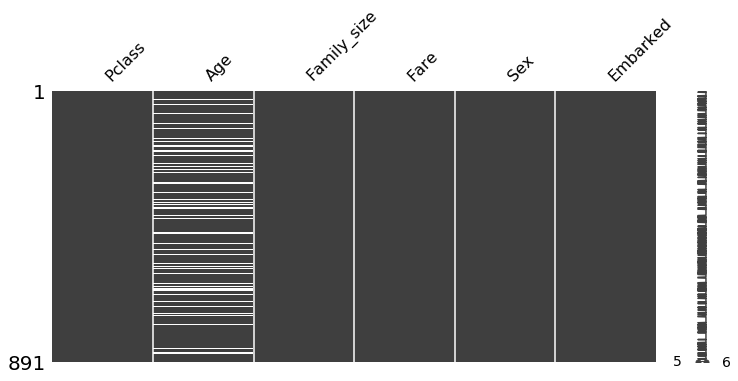

In [15]:
msno.matrix(X_train,figsize=(12,5))

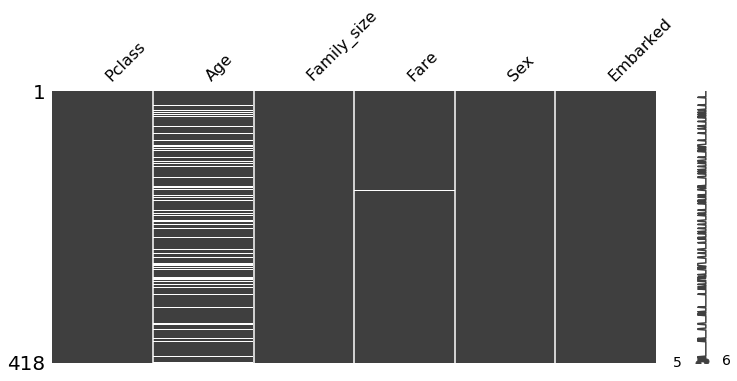

In [16]:
msno.matrix(X_test,figsize=(12,5))

# 認為用年齡部分中位數取代缺值更為準確

In [17]:
X_train['Age'].fillna(X_train['Age'].median(), inplace=True)
X_train['Embarked'].fillna('S', inplace=True)
X_test['Age'].fillna(X_test['Age'].median(), inplace=True)
X_test['Fare'].fillna(X_test['Fare'].mean(), inplace=True)

C:\Users\ericlin\Anaconda3\lib\site-packages\pandas\core\generic.py:3660: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
Pclass         891 non-null int64
Age            891 non-null float64
Family_size    891 non-null int64
Fare           891 non-null float64
Sex            891 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(2), object(2)
memory usage: 41.8+ KB


In [19]:
X_train = pd.get_dummies(X_train)

In [20]:
X_train.head()

,Pclass,Age,Family_size,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,7.2500,0,1,0,0,1
1,1,38.0,1,71.2833,1,0,1,0,0
2,3,26.0,0,7.9250,1,0,0,0,1
3,1,35.0,1,53.1000,1,0,0,0,1
4,3,35.0,0,8.0500,0,1,0,0,1


In [21]:
X_test = pd.get_dummies(X_test)

In [22]:
X_test.head()

,Pclass,Age,Family_size,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,7.8292,0,1,0,1,0
1,3,47.0,1,7.0000,1,0,0,0,1
2,2,62.0,0,9.6875,0,1,0,1,0
3,3,27.0,0,8.6625,0,1,0,0,1
4,3,22.0,2,12.2875,1,0,0,0,1


In [23]:
rfc = RandomForestClassifier()

In [24]:
cross_val_score(rfc, X_train, y_train, cv=10).mean()

0.80484054023379858

In [25]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [26]:
survived_predict = rfc.predict(X_test)

In [27]:
submission=pd.DataFrame({'PassengerId':test['PassengerId'], 'Survived':survived_predict})

In [28]:
submission.to_csv('submission.csv', index=False)